# Logistic Regression, LDA, QDA, KNN

In [ ]:
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib

os.chdir('C:\\Users\\dioni\\Desktop\\ISLR data')

In [3]:
stock_market = pd.read_csv('Smarket.csv', index_col = [0])

In [28]:
stock_market.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [6]:
stock_market.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Lag = percentage returns for each of the five previous trading days; 
Volume = total number of shares traded on the previous day, in billions;
Today = percentage return on the date in question;
Direction = whether the market was Up or Down on this date

In [7]:
stock_market.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [8]:
stock_market.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


No association between Today's returns and Lags, only correlation is between year and volume

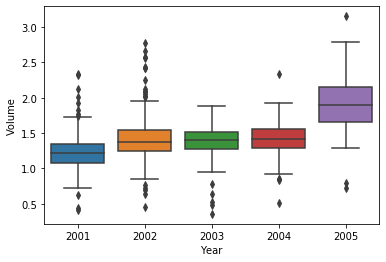

In [24]:
sns.boxplot(x = 'Year', y = 'Volume', data = stock_market)

The average number of shares traded daily increases from 2001 to 2005

## Logistic regression

In [166]:
y = stock_market['Direction']
X = stock_market[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)
y = pd.get_dummies(y, drop_first = True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [167]:
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 2.197001
         Iterations 4


In [168]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Oct 2019   Pseudo R-squ.:                     inf
Time:                        15:48:32   Log-Likelihood:                -2746.3
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In sample predictions that correspond to the probabilities of market going Up because it is the encoded dependent variable

In [7]:
y_pred = pd.DataFrame(logit_results.predict(X), columns = ['values'])
y_pred.head()

,values
1,0.507084
2,0.481468
3,0.481139
4,0.515222
5,0.510781


In [8]:
y_pred['Direction'] = 'Up'
y_pred.loc[y_pred['values'] < 0.5, 'Direction'] = 'Down'
y_pred.head()

,values,Direction
1,0.507084,Up
2,0.481468,Down
3,0.481139,Down
4,0.515222,Up
5,0.510781,Up


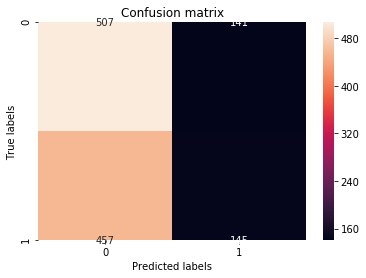

In [9]:
cm = confusion_matrix(stock_market['Direction'], y_pred['Direction'], labels = ['Up', 'Down'])
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
plt.show()

In [255]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center", va = 'bottom',
                     color = "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", va = 'bottom', 
                     color = "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

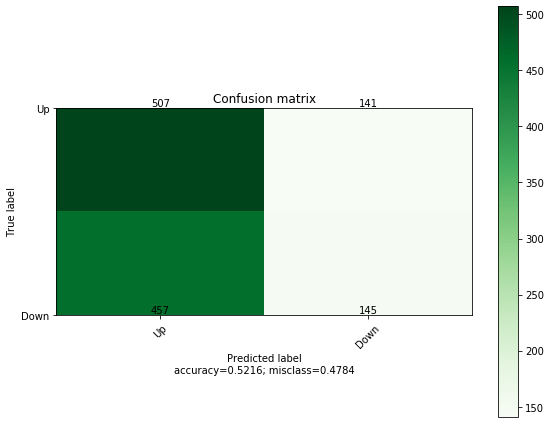

In [29]:
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

Training error rate is 47.8%

## Logistic regression with test set

In [37]:
stock_market_train = stock_market.loc[stock_market['Year'] < 2005]
stock_market_test = stock_market.loc[stock_market['Year'] > 2004]
y_train = stock_market_train['Direction']
X_train = stock_market_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_train = sm.add_constant(X_train)
y_train = pd.get_dummies(y_train, drop_first = True)

X_test = stock_market_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = sm.add_constant(X_test)
y_test = stock_market_test['Direction']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
stock_market_train.head(-5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
989,2004,-0.208,0.194,0.392,0.899,-0.104,1.7939,-0.749,Down
990,2004,-0.749,-0.208,0.194,0.392,0.899,2.3350,0.038,Up
991,2004,0.038,-0.749,-0.208,0.194,0.392,1.4228,0.904,Up
992,2004,0.904,0.038,-0.749,-0.208,0.194,1.4837,0.342,Up


In [34]:
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 3.346650
         Iterations 4


In [35]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                     inf
Time:                        14:36:08   Log-Likelihood:                -3340.0
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [38]:
y_pred = pd.DataFrame(logit_results.predict(X_test), columns = ['values'])
y_pred.head()

,values
999,0.528220
1000,0.515669
1001,0.522652
1002,0.513854
1003,0.498334


In [39]:
y_pred['Direction'] = 'Up'
y_pred.loc[y_pred['values'] < 0.5, 'Direction'] = 'Down'
y_pred.head()

,values,Direction
999,0.528220,Up
1000,0.515669,Up
1001,0.522652,Up
1002,0.513854,Up
1003,0.498334,Down


### Confusion matrix

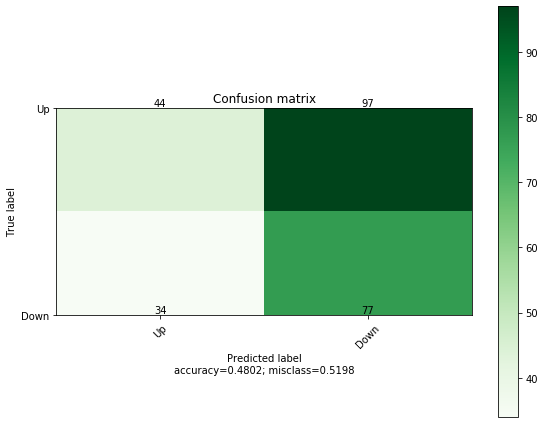

In [40]:
cm = confusion_matrix(stock_market_test['Direction'], y_pred['Direction'], labels = ['Up', 'Down'])
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

Accuracy worse than random guessing, test error rate is 52%

## Logistic regression with test set and most significant predictors

Lag 1 and Lag 2 have the lowest p-values

In [45]:
y_train = stock_market_train['Direction']
X_train = stock_market_train[['Lag1', 'Lag2']]
X_train = sm.add_constant(X_train)
y_train = pd.get_dummies(y_train, drop_first = True)

X_test = stock_market_test[['Lag1', 'Lag2']]
X_test = sm.add_constant(X_test)
y_test = stock_market_test['Direction']

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
logit_model = sm.Logit(y_train, X_train)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 2.875695
         Iterations 3


In [43]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                  998
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2019   Pseudo R-squ.:                     inf
Time:                        14:45:13   Log-Likelihood:                -2869.9
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0322      0.063      0.508      0.611      -0.092       0.156
Lag1          -0.0556      0.052     -1.076      0.282      -0.157       0.046
Lag2          -0.0445      0.052     -0.861      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [46]:
y_pred = pd.DataFrame(logit_results.predict(X_test), columns = ['values'])
y_pred['Direction'] = 'Up'
y_pred.loc[y_pred['values'] < 0.5, 'Direction'] = 'Down'
y_pred.head()

,values,Direction
999,0.509827,Up
1000,0.520824,Up
1001,0.533263,Up
1002,0.526057,Up
1003,0.507210,Up


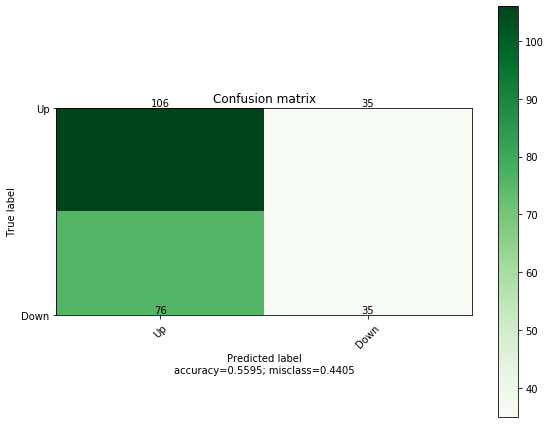

In [47]:
cm = confusion_matrix(stock_market_test['Direction'], y_pred['Direction'], labels = ['Up', 'Down'])
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

How many 'Up' values are there in the test data?

In [60]:
stock_market_test.loc[stock_market_test['Direction'] == 'Up', 'Direction'].count() 

141

If compared to the whole length of the test set

In [61]:
141 / len(stock_market_test)

0.5595238095238095

If all 'Up' values are predicted the naive classifier would have the same accuracy as the logistic regression classifier. On days when the logistic regression predicts an 'Up' value 106/(76+106) it is correct in 58% of the cases --> buying stocks when the model predicts an increase in market

In [62]:
106 / (76 + 106)

0.5824175824175825

Predicting direction of a random value of Lag1 and Lag2

In [73]:
x_lag = pd.DataFrame(data = [[1.2, 1.1], [1.5, -0.8]], columns = ['Lag1', 'Lag2'])
x_lag = sm.add_constant(x_lag)
x_lag

,const,Lag1,Lag2
0,1.0,1.2,1.1
1,1.0,1.5,-0.8


In [74]:
y_pred_lag = pd.DataFrame(logit_results.predict(x_lag), columns = ['values'])
y_pred_lag['Direction'] = 'Up'
y_pred_lag.loc[y_pred_lag['values'] < 0.5, 'Direction'] = 'Down'
y_pred_lag.head()

,values,Direction
0,0.479146,Down
1,0.496094,Down


# Linear Discriminant analysis

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
y_train = stock_market_train['Direction']
X_train = stock_market_train[['Lag1', 'Lag2']]

X_test = stock_market_test[['Lag1', 'Lag2']]
y_test = stock_market_test['Direction']

In [130]:
y_train

1        Up
2        Up
3      Down
4        Up
5        Up
       ... 
994    Down
995      Up
996    Down
997      Up
998    Down
Name: Direction, Length: 998, dtype: object

In [131]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [133]:
lda_classifier.classes_

array(['Down', 'Up'], dtype='<U4')

In [132]:
lda_classifier.priors_

array([0.49198397, 0.50801603])

Prior (π) represents the prior probability that a randomly chosen observation comes from the kth category of the response variable, 49.2% of the training observations correspond to days during the which the market went down

In [134]:
lda_classifier.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

Group means (averages of each predictor within each class) are used for the calculation of the probabilities. Group means can be given by.

In [136]:
# index 0 is class encoded as 0, index 1 is class encoded as 1
group_means = pd.DataFrame(lda_classifier.means_, columns = [X_train.columns[0], X_train.columns[1]], index =[lda_classifier.classes_[0], lda_classifier.classes_[1]])
group_means

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


When the market is positive there is a tendency for the previous 2 days' returns to be negative, adn when the market is going down they have a tendency to be positive.

In [137]:
lda_classifier.coef_

array([[-0.05544078, -0.0443452 ]])

The coefficients of linear discriminants are linear combination of Lag1 and Lag2 that are used to form the LDA decision rule

In [140]:
y_pred = lda_classifier.predict(X_test)

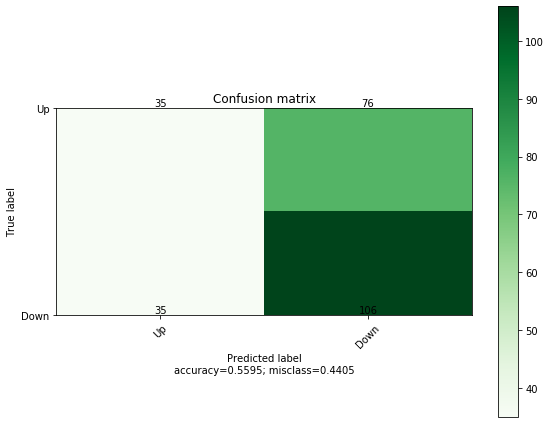

In [142]:
cm = confusion_matrix(stock_market_test['Direction'], y_pred, labels = ['Down', 'Up'])
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

In [124]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(35, 76, 35, 106)

# Quadratic Discriminant Analysis

In [143]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
y_train = stock_market_train['Direction']
X_train = stock_market_train[['Lag1', 'Lag2']]

X_test = stock_market_test[['Lag1', 'Lag2']]
y_test = stock_market_test['Direction']

In [144]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [145]:
y_pred = qda_classifier.predict(X_test)

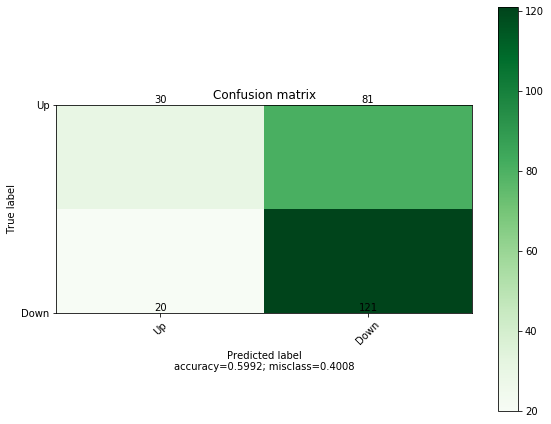

In [146]:
cm = confusion_matrix(stock_market_test['Direction'], y_pred, labels = ['Down', 'Up'])
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

60% accuracy = high levels of accuracy for stock data

# K-Nearest Neighbors

In [148]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)

In [150]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [152]:
y_pred = knn_classifier.predict(X_test)

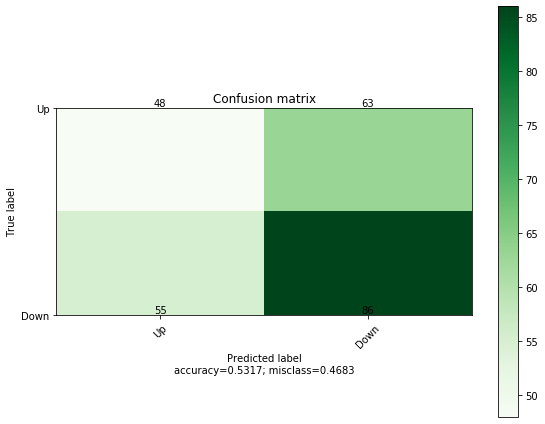

In [153]:
cm = confusion_matrix(stock_market_test['Direction'], y_pred, labels = ['Down', 'Up'])
plot_confusion_matrix(cm, target_names = ['Up', 'Down'], normalize = False, cmap = 'Greens')

With 3 neighbors KNN shows worseresults than QDA

# Standardizing data

In classifiers based on distances such as KNN, the scale of data is important so values should be standardized or normalized.
Standardized data has a mean of zero and a standard deviation of one

In [157]:
from sklearn.preprocessing import StandardScaler 

In [156]:
caravan = pd.read_csv('Caravan.csv', index_col = [0])
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [159]:
caravan_train = caravan.drop(columns = ['Purchase'])
caravan_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [160]:
scaler = StandardScaler()
scaler.fit_transform(caravan_train)

array([[ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.99229684, -0.27257995, -0.85950007, ..., -0.15062046,
        -0.08734772, -0.11881647],
       ...,
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.75875388, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647],
       [ 0.68090623, -0.27257995,  0.40669664, ..., -0.15062046,
        -0.08734772, -0.11881647]])

In [175]:
X_test = caravan_train[:1000]
X_train = caravan_train[1000:]
y_test = caravan[:1000]['Purchase']
y_train = caravan[1000:]['Purchase']

In [183]:
len(y_test)

1000

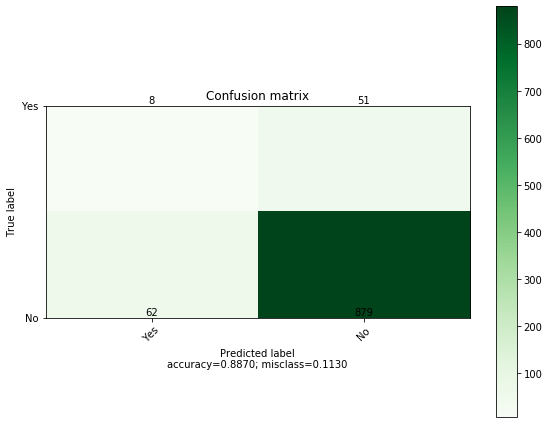

In [194]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = ['Yes', 'No'])
plot_confusion_matrix(cm, target_names = ['Yes', 'No'], normalize = False, cmap = 'Greens')

Although the accuracy is very high, we are interested in how many customers will purchase the insurance so we're interested in the success rate of the individuals that were predicted to buy the inssurance, and that accuracy is 8 / 51 = 15.7% while random guessing gives us

In [202]:
y_test.loc[y_test == 'Yes'].count() / len(y_test)

0.059

5.9% accuracy, which means that KNN found some pattern in the data

# Weekly data

In [214]:
weekly = pd.read_csv('Weekly.csv')
weekly_direction_dummies = pd.get_dummies(weekly, drop_first = True)

In [220]:
predictors_correlation = weekly_direction_dummies.corr().abs()

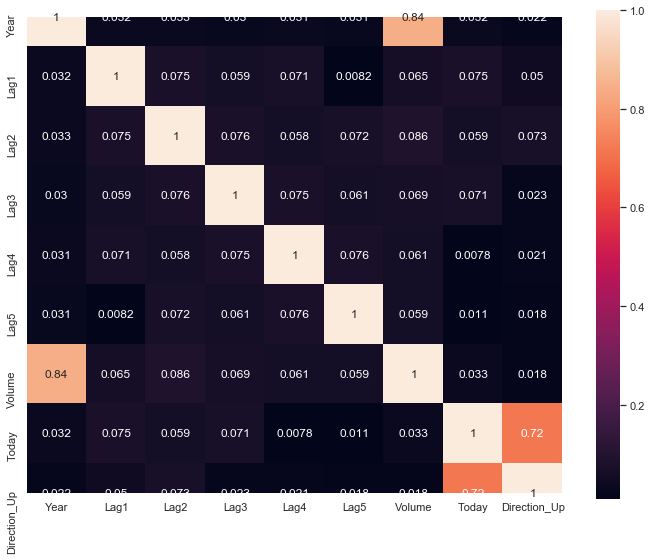

In [231]:
sns.heatmap(predictors_correlation, annot = True, square = True)

In [233]:
matplotlib.__version__

'3.1.1'

Correlation between Year - Volume and Today - Direction. Among lag biggest correlation between Lag2 and Direction

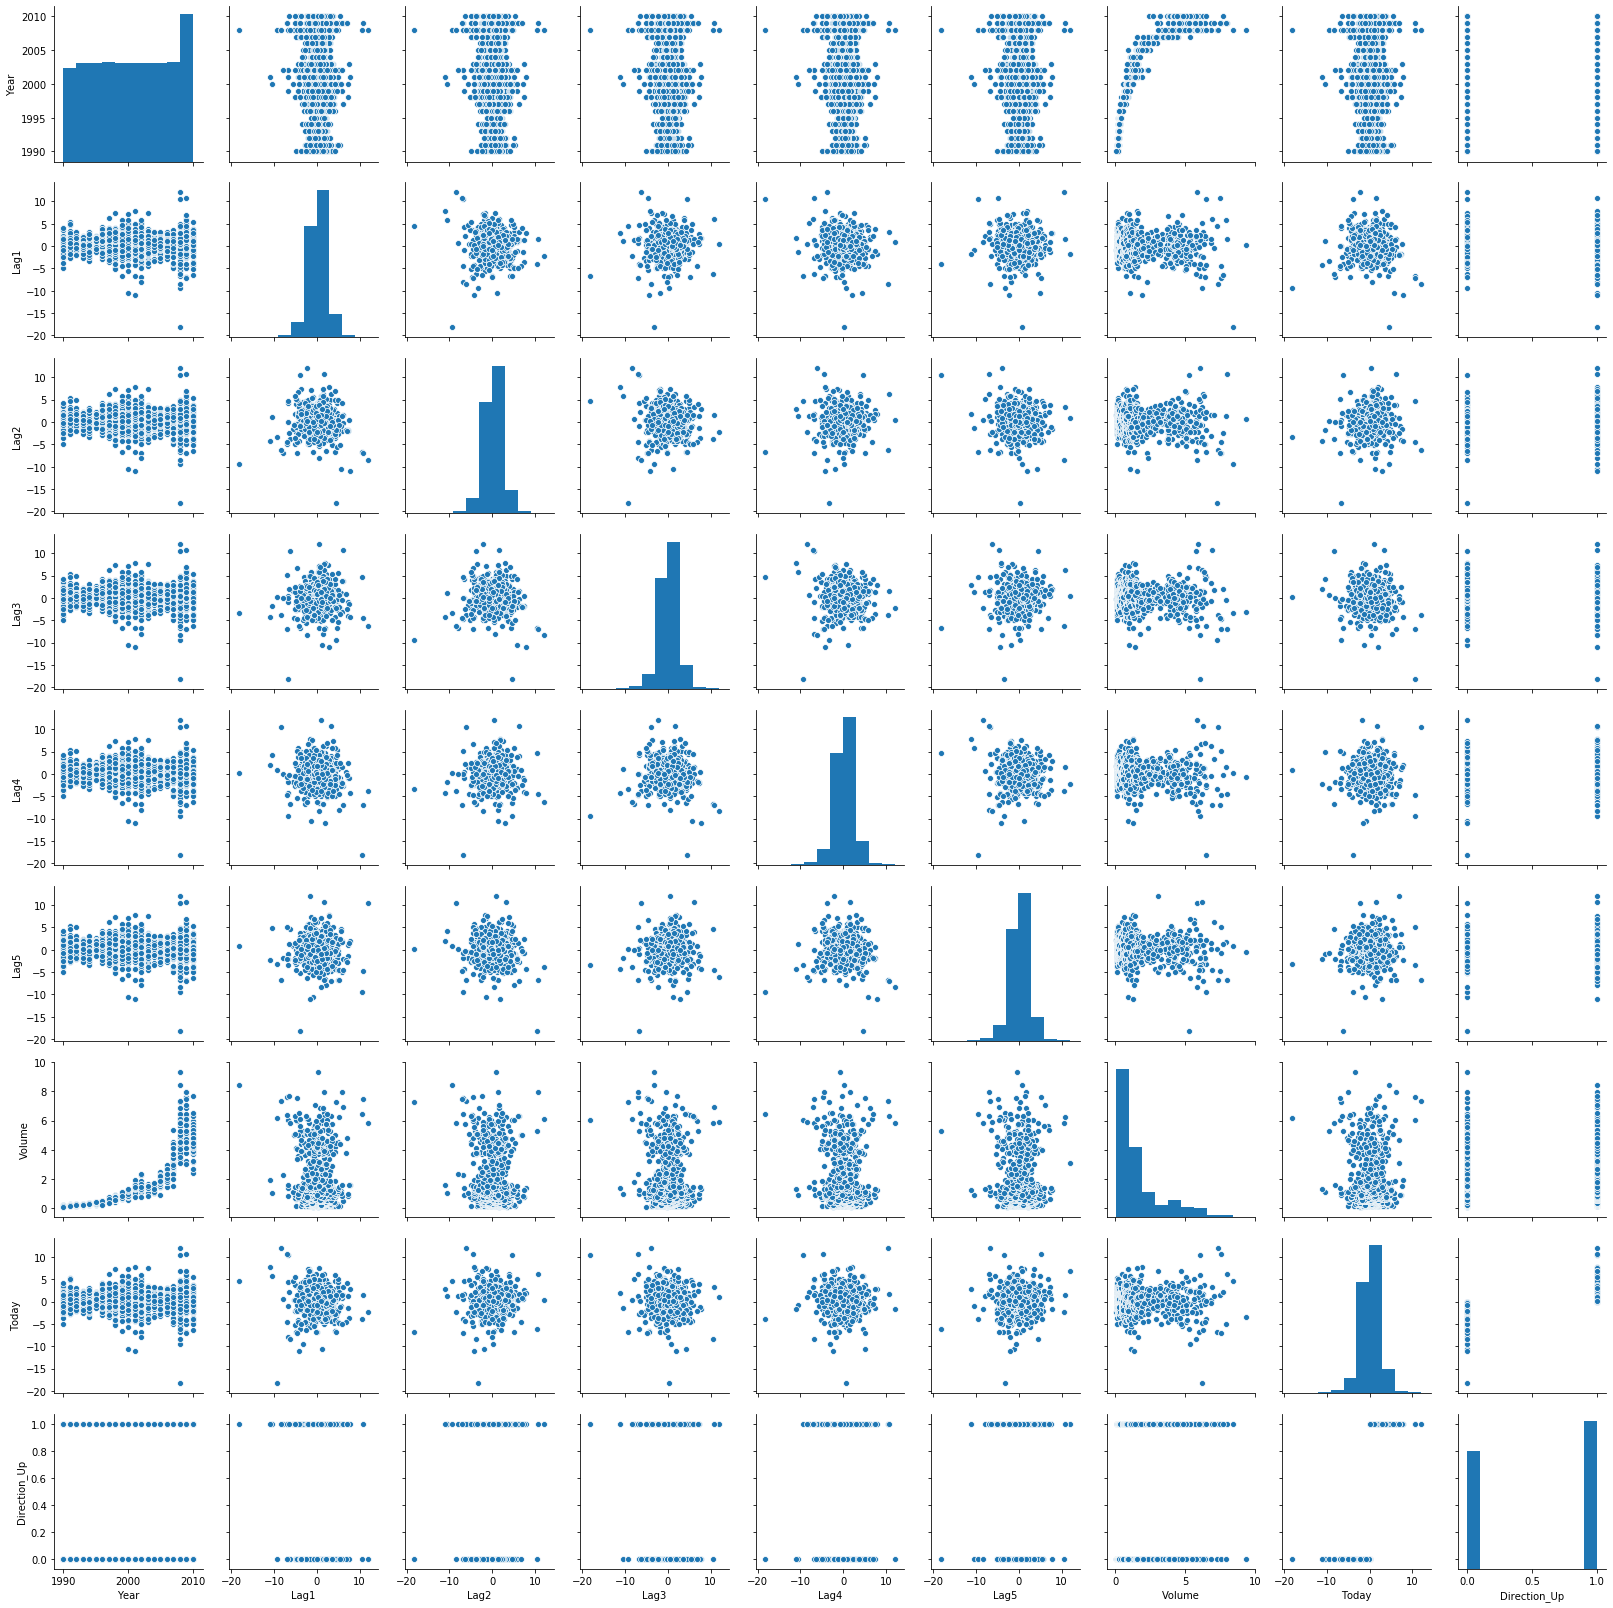

In [216]:
sns.pairplot(weekly_direction_dummies)

Exponantial increase in Volume by Year

## Logistic regression

In [239]:
X = weekly.drop(columns = ['Direction', 'Year', 'Today'])
y = weekly['Direction']
y = pd.get_dummies(y, drop_first = True)
y.head()

,Up
0,0
1,0
2,1
3,1
4,1


In [240]:
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4


In [241]:
print(logit_results.summary())

                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Oct 2019   Pseudo R-squ.:                     inf
Time:                        19:27:35   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Significant predictors is Lag2

### Plotting the confusion matrix

In [242]:
logit_results.pred_table()

array([[ 54., 430.],
       [ 48., 557.]])

In [246]:
y_pred = pd.DataFrame(logit_results.predict(X), columns = ['values'])

In [248]:
y_pred['Direction'] = 'Up'
y_pred.loc[y_pred['values'] < 0.5, 'Direction' ] = 'Down'
y_pred.head()

,values,Direction
0,0.608625,Up
1,0.601031,Up
2,0.587570,Up
3,0.481642,Down
4,0.616901,Up


In [250]:
cm = confusion_matrix(weekly['Direction'], y_pred['Direction'], labels = ['Down', 'Up'])
cm

array([[ 54, 430],
       [ 48, 557]], dtype=int64)

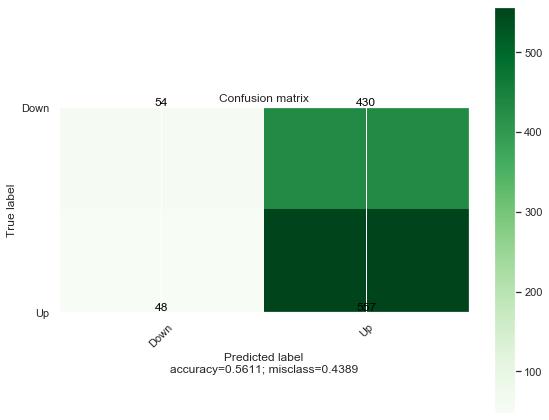

In [256]:
plot_confusion_matrix(cm, target_names = ['Down', 'Up'], , cmap = 'Greens')

In [258]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(54, 430, 48, 557)

Low overall accuracy on the training set, when the model guesses that stocks are going up in 92% the stocks went up 557 / (48 + 557), but when the stock are going down the model has terrible prediction power 54 / (430 + 54)

### Logistic regression with test data, and Lag2 as the only predictor